# Business case: Understanding profitability in the US financial market
- *Instructions can be found at:* https://rpubs.com/cdorante/tc3006c_p1

- Ricardo Andrés Cáceres Villibord
A01706972

**ABSTRACT**
- This is business case prepared for the Statistics Module (Bloque 1) of the Advanced AI concentration

### Data dictrionary of historical quarterly financial data

| Variable             | Description                                                                       |
|----------------------|-----------------------------------------------------------------------------------|
| firm                 | Unique code of the company (also called ticker)                                   |
| q                    | Quarter date                                                                      |
| fiscalmonth          | Month of the year when the firm closes a fiscal year                               |
| revenue              | Total sales of the firm from the first fiscal quarter to the current quarter     |
| cogs                 | Cost of good sold - variable costs of the products sold - from the first fiscal quarter to the current quarter |
| sgae                 | Sales and general administrative expenses - from the first fiscal quarter to the current quarter |
| otherincome          | Other operational income/expenses that are not directly from the core operations of the firm - from the first fiscal quarter to the current quarter |
| extraordinaryitems  | Extra income/expenses not related to regular operations - from the first fiscal quarter to the current quarter |
| finexp               | Financial expenses - interest expenses paid (generated from loans) - from the first fiscal quarter to the current quarter |
| incometax            | Income tax from the first fiscal quarter to the current quarter                   |
| totalassets          | Total assets of the firm at the end of the quarter                                |
| currentassets        | Current assets of the firm at the end of the quarter                              |
| totalliabilities     | Total liabilities of the firm at the end of the quarter                           |
| currentliabilities   | Current liabilities of the firm at the end of the quarter                         |
| longdebt             | Balance of long-term financial debt (loans to pay longer than 1 year)             |
| adjprice             | Stock adjusted price at the end of the quarter; adjusted for stock splits and dividend payments; used to calculate stock returns |
| originalprice        | Historical stock price (not adjusted); used to calculate historical market value |
| sharesoutstanding    | Historical number of shares available in the market                               |
| fixedassets          | Fixed assets value at the end of the quarter                                     |
| year                 | Calendar year                                                                     |
| yearf                | Fiscal year - this depends on when the firm ends its fiscal year; if fiscalmonth=12 in the quarter 3, then the fiscal year will start in Q4 of a year and ends in the Q3 of the following year |


### The firmus2023.csv is a catalog of all active and cancelled US firms:

| Variable             | Description                                                                       |
|----------------------|-----------------------------------------------------------------------------------|
| firm                 | Unique code of the company (also called ticker)                                   |
| name                 | Name of the firm                                                                 |
| status               | Status of the firm: active or cancelled                                           |
| partind              | Percent participation in the S&P500 market index                                  |
| naics1               | North American Industry Classification Code - Level 1                            |
| naics2               | North American Industry Classification Code - Level 2                            |
| SectorEconomatica    | Economatica Industry classification                                              |


The main objectives of your analysis are a) To learn about the firm composition of whole US financial market (using all firms), and b) Select firms from 1 industry and then learn which financial factors/variables are related to stock return.

## Implementación

### 1. Importar librerías necesarias para el proyecto:

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats.mstats import winsorize

In [214]:
data = pd.read_csv('../DataSets/dataus2023.csv')
data.shape

(533088, 21)

In [215]:
firms = pd.read_csv('../DataSets/firmsus2023.csv')
firms.shape
data

,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,currentassets,inventory,totalliabilities,currentliabilities,longdebt,adjprice,originalprice,sharesoutstanding,fixedassets,year
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,63.33,104.00,"452,000.00",NaN,2000
1,A,2000q2,6.00,"4,731,000.00","2,421,000.00","1,925,000.00","73,000.00",0.00,0.00,"161,000.00",...,"5,057,000.00","1,622,000.00","2,679,000.00","2,186,000.00",0.00,44.91,73.75,"452,271.97","1,453,000.00",2000
2,A,2000q3,9.00,"7,401,000.00","3,790,000.00","3,016,000.00","101,000.00",0.00,0.00,"244,000.00",...,"5,344,000.00","1,762,000.00","2,925,000.00","2,510,000.00",0.00,29.80,48.94,"453,014.58","1,581,000.00",2000
3,A,2000q4,12.00,"10,773,000.00","5,522,000.00","4,198,000.00","111,000.00",0.00,0.00,"407,000.00",...,"5,655,000.00","1,853,000.00","3,160,000.00","2,758,000.00",0.00,33.34,54.75,"456,366.38","1,741,000.00",2000
4,A,2001q1,3.00,"2,841,000.00","1,449,000.00","1,113,000.00","19,000.00","-25,000.00",0.00,"119,000.00",...,"5,461,000.00","2,129,000.00","3,667,000.00","3,070,000.00",0.00,18.71,30.73,"456,769.74","1,821,000.00",2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533083,ZY_old,2022q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.78,2.78,"104,098.54",NaN,2022
533084,ZY_old,2022q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.43,2.43,"104,098.54",NaN,2022
533085,ZY_old,2023q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"104,098.54",NaN,2023
533086,ZY_old,2023q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"104,098.54",NaN,2023


### 2. Hacemos un merge para adicionar la industria y el status a data:

In [216]:
# Convertir las fechas de la columna 'q' en el formato de trimestres y almacenar en la nueva columna de 'qdate'
data['qdate'] = pd.PeriodIndex(data.q, freq="Q")
data

,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,inventory,totalliabilities,currentliabilities,longdebt,adjprice,originalprice,sharesoutstanding,fixedassets,year,qdate
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,63.33,104.00,"452,000.00",NaN,2000,2000Q1
1,A,2000q2,6.00,"4,731,000.00","2,421,000.00","1,925,000.00","73,000.00",0.00,0.00,"161,000.00",...,"1,622,000.00","2,679,000.00","2,186,000.00",0.00,44.91,73.75,"452,271.97","1,453,000.00",2000,2000Q2
2,A,2000q3,9.00,"7,401,000.00","3,790,000.00","3,016,000.00","101,000.00",0.00,0.00,"244,000.00",...,"1,762,000.00","2,925,000.00","2,510,000.00",0.00,29.80,48.94,"453,014.58","1,581,000.00",2000,2000Q3
3,A,2000q4,12.00,"10,773,000.00","5,522,000.00","4,198,000.00","111,000.00",0.00,0.00,"407,000.00",...,"1,853,000.00","3,160,000.00","2,758,000.00",0.00,33.34,54.75,"456,366.38","1,741,000.00",2000,2000Q4
4,A,2001q1,3.00,"2,841,000.00","1,449,000.00","1,113,000.00","19,000.00","-25,000.00",0.00,"119,000.00",...,"2,129,000.00","3,667,000.00","3,070,000.00",0.00,18.71,30.73,"456,769.74","1,821,000.00",2001,2001Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533083,ZY_old,2022q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.78,2.78,"104,098.54",NaN,2022,2022Q3
533084,ZY_old,2022q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.43,2.43,"104,098.54",NaN,2022,2022Q4
533085,ZY_old,2023q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"104,098.54",NaN,2023,2023Q1
533086,ZY_old,2023q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"104,098.54",NaN,2023,2023Q2


In [217]:
firms.columns
# Sacar lo necesario
firms1 = firms[["empresa", "Nombre", "status", "naics1"]]
# Ponerles un nombre a las columnas
firms1.columns=['firm', 'Empresa', 'status', 'industria']

# HACER EL MERGE de data y firms1
# El 'on=firm' especifica que la columna 'firm' se utilizara com clave para la fusion. Las filas que tienen el mismo valor en la columna 'firm' se fusionaran
# El 'how=left' especifica que es un left join
data = pd.merge(data, firms1, on="firm", how="left")

data.head(10)

,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,longdebt,adjprice,originalprice,sharesoutstanding,fixedassets,year,qdate,Empresa,status,industria
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,63.33,104.00,"452,000.00",NaN,2000,2000Q1,"Agilent Technologies, Inc",activo,Industrias manufactureras
1,A,2000q2,6.00,"4,731,000.00","2,421,000.00","1,925,000.00","73,000.00",0.00,0.00,"161,000.00",...,0.00,44.91,73.75,"452,271.97","1,453,000.00",2000,2000Q2,"Agilent Technologies, Inc",activo,Industrias manufactureras
2,A,2000q3,9.00,"7,401,000.00","3,790,000.00","3,016,000.00","101,000.00",0.00,0.00,"244,000.00",...,0.00,29.80,48.94,"453,014.58","1,581,000.00",2000,2000Q3,"Agilent Technologies, Inc",activo,Industrias manufactureras
3,A,2000q4,12.00,"10,773,000.00","5,522,000.00","4,198,000.00","111,000.00",0.00,0.00,"407,000.00",...,0.00,33.34,54.75,"456,366.38","1,741,000.00",2000,2000Q4,"Agilent Technologies, Inc",activo,Industrias manufactureras
4,A,2001q1,3.00,"2,841,000.00","1,449,000.00","1,113,000.00","19,000.00","-25,000.00",0.00,"119,000.00",...,0.00,18.71,30.73,"456,769.74","1,821,000.00",2001,2001Q1,"Agilent Technologies, Inc",activo,Industrias manufactureras
5,A,2001q2,6.00,"4,930,000.00","2,683,000.00","2,025,000.00","277,000.00","-14,000.00",0.00,"235,000.00",...,0.00,19.79,32.50,"457,072.75","1,848,000.00",2001,2001Q2,"Agilent Technologies, Inc",activo,Industrias manufactureras
6,A,2001q3,9.00,"6,736,000.00","3,829,000.00","3,027,000.00","312,000.00","-19,000.00",0.00,"142,000.00",...,0.00,11.91,19.55,"460,637.31","1,807,000.00",2001,2001Q3,"Agilent Technologies, Inc",activo,Industrias manufactureras
7,A,2001q4,12.00,"8,396,000.00","5,166,000.00","4,008,000.00","301,000.00","580,000.00",0.00,"-71,000.00",...,0.00,17.36,28.51,"463,695.16","1,848,000.00",2001,2001Q4,"Agilent Technologies, Inc",activo,Industrias manufactureras
8,A,2002q1,3.00,"1,426,000.00","878,000.00","990,000.00","19,000.00","2,000.00",0.00,"-106,000.00",...,"1,150,000.00",21.29,34.96,"463,859.98","1,787,000.00",2002,2002Q1,"Agilent Technologies, Inc",activo,Industrias manufactureras
9,A,2002q2,6.00,"2,883,000.00","1,732,000.00","1,942,000.00","41,000.00","-4,000.00",0.00,"-186,000.00",...,"1,150,000.00",14.40,23.65,"464,247.55","1,728,000.00",2002,2002Q2,"Agilent Technologies, Inc",activo,Industrias manufactureras


In [218]:
# Esto significa que el DataFrame 'data' tendrá un índice jerárquico con dos niveles, donde "firm" es el primer nivel y "qdate" es el segundo nivel.
data.set_index(["firm", "qdate"], inplace=True)
data

q  fiscalmonth       revenue         cogs         sgae  \
firm   qdate                                                                 
A      2000Q1  2000q1          NaN           NaN          NaN          NaN   
       2000Q2  2000q2         6.00  4,731,000.00 2,421,000.00 1,925,000.00   
       2000Q3  2000q3         9.00  7,401,000.00 3,790,000.00 3,016,000.00   
       2000Q4  2000q4        12.00 10,773,000.00 5,522,000.00 4,198,000.00   
       2001Q1  2001q1         3.00  2,841,000.00 1,449,000.00 1,113,000.00   
...               ...          ...           ...          ...          ...   
ZY_old 2022Q3  2022q3          NaN           NaN          NaN          NaN   
       2022Q4  2022q4          NaN           NaN          NaN          NaN   
       2023Q1  2023q1          NaN           NaN          NaN          NaN   
       2023Q2  2023q2          NaN           NaN          NaN          NaN   
       2023Q3  2023q3          NaN           NaN          NaN          NaN   

               otherincome  extraordinaryitems  finexp  incometax  \
firm   qdate                                                        
A      2000Q1          NaN                 NaN     NaN        NaN   
       2000Q2    73,000.00                0.00    0.00 161,000.00   
       2000Q3   101,000.00                0.00    0.00 244,000.00   
       2000Q4   111,000.00                0.00    0.00 407,000.00   
       2001Q1    19,000.00          -25,000.00    0.00 119,000.00   
...                    ...                 ...     ...        ...   
ZY_old 2022Q3          NaN                 NaN     NaN        NaN   
       2022Q4          NaN                 NaN     NaN        NaN   
       2023Q1          NaN                 NaN     NaN        NaN   
       2023Q2          NaN                 NaN     NaN        NaN   
       2023Q3          NaN                 NaN     NaN        NaN   

               totalassets  ...  currentliabilities  longdebt  adjprice  \
firm   qdate                ...                                           
A      2000Q1          NaN  ...                 NaN       NaN     63.33   
       2000Q2 7,321,000.00  ...        2,186,000.00      0.00     44.91   
       2000Q3 7,827,000.00  ...        2,510,000.00      0.00     29.80   
       2000Q4 8,425,000.00  ...        2,758,000.00      0.00     33.34   
       2001Q1 9,208,000.00  ...        3,070,000.00      0.00     18.71   
...                    ...  ...                 ...       ...       ...   
ZY_old 2022Q3          NaN  ...                 NaN       NaN      2.78   
       2022Q4          NaN  ...                 NaN       NaN      2.43   
       2023Q1          NaN  ...                 NaN       NaN       NaN   
       2023Q2          NaN  ...                 NaN       NaN       NaN   
       2023Q3          NaN  ...                 NaN       NaN       NaN   

               originalprice  sharesoutstanding  fixedassets  year  \
firm   qdate                                                         
A      2000Q1         104.00         452,000.00          NaN  2000   
       2000Q2          73.75         452,271.97 1,453,000.00  2000   
       2000Q3          48.94         453,014.58 1,581,000.00  2000   
       2000Q4          54.75         456,366.38 1,741,000.00  2000   
       2001Q1          30.73         456,769.74 1,821,000.00  2001   
...                      ...                ...          ...   ...   
ZY_old 2022Q3           2.78         104,098.54          NaN  2022   
       2022Q4           2.43         104,098.54          NaN  2022   
       2023Q1            NaN         104,098.54          NaN  2023   
       2023Q2            NaN         104,098.54          NaN  2023   
       2023Q3            NaN         104,098.54          NaN  2023   

                                 Empresa     status  \
firm   qdate                                          
A      2000Q1  Agilent Technologies, Inc     activo   
       2000Q2  Agilent Technologies, Inc     activo   


### 3. Calculation of Financial Variables and Ratios

In [219]:
# Quarterly Returns
data['rq'] = np.log(data['adjprice']) - np.log(data.groupby(['firm'])['adjprice'].shift(4))
# Log Annual Returns
data['ry'] = np.log(data['adjprice']) - np.log(data.groupby(['firm'])['adjprice'].shift(1))

# Calculo retornos 1 año en el futuro
data['f1rq'] =  data['rq'].shift(-1)
data['f4rq'] = data['rq'].shift(-4)

# Calculate operating profit (also called earnings before interest and taxes) : ebit = revenue - cogs - sgae
data['ebit'] = data['revenue'] - data['cogs'] - data['sgae']

# Calculate operating profit margin: opm = ebit / revenue
data['opm'] = np.where(data['revenue']==0, np.NaN,data['ebit'] / data['revenue'])

# Calculate net income as: netincome = ebit + otherincome + extraordinaryitems - financial expenses - incometax
data['netincome'] = data['ebit'] + data['otherincome'] + data['extraordinaryitems'] - data['finexp'] - data['incometax']

# Calculate profit margin (ratio) as: pm = ni / revenue
data['pm'] = np.where(data['revenue']==0, np.NaN, data['netincome'] / data['revenue'])

# Calculate asset turn over ratio: ato = revenue / totalassets   = que tanto la empresa vendio con respecto a su total de activos
data['ato'] = np.where(data['totalassets']==0, np.NaN, data['revenue'] / data['totalassets'])

# Calculate acid ratio: acidratio = currentassets / currentliabilities
data['acidratio'] = np.where(data['currentliabilities']==0, np.NaN, data['currentassets'] / data['currentliabilities'])

# Calculate financial leverage ratio as: finlev=longdebt / totalassets    =  apalancamiento; que tanto la empresa debe $ con respecto a lo que tienen en activo
data['finlev'] = np.where(data['totalassets']==0, np.NaN, data['longdebt'] / data['totalassets'])

# Calculate market value as: mvalue = originalprice * sharesoutstanding
data['mvalue'] = data['originalprice'] * data['sharesoutstanding']

# Calculate book value as: bookvalue = totalassets - totalliabilities
data['bookvalue'] = data['totalassets'] - data['totalliabilities']


# Para poder leer mejor los numeros, los formateamos con comas y a dos puntos decimales
pd.options.display.float_format = '{:,.2f}'.format

data.head()

q  fiscalmonth       revenue         cogs         sgae  \
firm qdate                                                                 
A    2000Q1  2000q1          NaN           NaN          NaN          NaN   
     2000Q2  2000q2         6.00  4,731,000.00 2,421,000.00 1,925,000.00   
     2000Q3  2000q3         9.00  7,401,000.00 3,790,000.00 3,016,000.00   
     2000Q4  2000q4        12.00 10,773,000.00 5,522,000.00 4,198,000.00   
     2001Q1  2001q1         3.00  2,841,000.00 1,449,000.00 1,113,000.00   

             otherincome  extraordinaryitems  finexp  incometax  totalassets  \
firm qdate                                                                     
A    2000Q1          NaN                 NaN     NaN        NaN          NaN   
     2000Q2    73,000.00                0.00    0.00 161,000.00 7,321,000.00   
     2000Q3   101,000.00                0.00    0.00 244,000.00 7,827,000.00   
     2000Q4   111,000.00                0.00    0.00 407,000.00 8,425,000.00   
     2001Q1    19,000.00          -25,000.00    0.00 119,000.00 9,208,000.00   

             ...  f4rq         ebit  opm  netincome   pm  ato  acidratio  \
firm qdate   ...                                                           
A    2000Q1  ... -1.22          NaN  NaN        NaN  NaN  NaN        NaN   
     2000Q2  ... -0.82   385,000.00 0.08 297,000.00 0.06 0.65       2.31   
     2000Q3  ... -0.92   595,000.00 0.08 452,000.00 0.06 0.95       2.13   
     2000Q4  ... -0.65 1,053,000.00 0.10 757,000.00 0.07 1.28       2.05   
     2001Q1  ...  0.13   279,000.00 0.10 154,000.00 0.05 0.31       1.78   

             finlev        mvalue    bookvalue  
firm qdate                                      
A    2000Q1     NaN 47,008,000.00          NaN  
     2000Q2    0.00 33,355,057.57 4,642,000.00  
     2000Q3    0.00 22,169,400.96 4,902,000.00  
     2000Q4    0.00 24,986,059.36 5,265,000.00  
     2001Q1    0.00 14,036,533.81 5,541,000.00  

[5 rows x 36 columns]

### 4. Firm Composition of the US Financial Market

Considering the **most recent** financial quarter of the dataset

In [220]:
# Sacar el quarter mas reciente
aux = data['q'] == '2023q2'
a_2023q2 =  data[aux]

- Show how many active firms by industry there are in the sample

In [221]:
# Sacar las status activo
aux2 = a_2023q2['status'] == 'activo'
active_2023q2 = a_2023q2[aux2]
active_firms_industry = active_2023q2['industria'].value_counts()
active_firms_industry

Industrias manufactureras                                                                        1540
Servicios financieros y de seguros                                                                686
Información en medios masivos                                                                     256
Comercio al por menor                                                                             145
Servicios profesionales, científicos y técnicos                                                   137
Servicios de apoyo a los negocios y manejo de residuos y desechos, y servicios de remediación     128
Minería, explotación de canteras y extracción de petróleo y gas                                   113
Comercio al por mayor                                                                              79
Empresas de electricidad, gas y agua                                                               77
Servicios de alojamiento temporal y de preparación de alimentos y bebidas         

- For each industry (and for all industries), what can you say about the typical firm size in terms of market value and book value? How much these variables change within each industry? How firm size (in market value) is distributed? You have to do the right descriptive statistics

In [222]:
active_2023q2.head()

,,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,totalassets,...,f4rq,ebit,opm,netincome,pm,ato,acidratio,finlev,mvalue,bookvalue
firm,qdate,,,,,,,,,,,,,,,,,,,,,
A,2023Q2,2023q2,6.00,"3,473,000.00","1,581,000.00","1,083,000.00","6,000.00",0.00,"28,000.00","133,000.00","10,792,000.00",...,NaN,"809,000.00",0.23,"654,000.00",0.19,0.32,2.37,0.25,"35,518,942.11","5,781,000.00"
AA,2023Q2,2023q2,6.00,"5,354,000.00","4,919,000.00","601,000.00","-60,000.00","20,000.00","53,000.00","74,000.00","14,128,000.00",...,NaN,"-166,000.00",-0.03,"-333,000.00",-0.06,0.38,1.80,0.13,"6,053,162.45","6,458,000.00"
AAIC,2023Q2,2023q2,6.00,"26,716.00","16,512.00",NaN,0.00,NaN,0.00,"1,496.00","817,470.00",...,NaN,NaN,NaN,NaN,NaN,0.03,NaN,0.11,"162,125.89","220,012.00"
AAL,2023Q2,2023q2,6.00,"26,244,000.00",0.00,"23,644,000.00","-21,000.00",0.00,"800,000.00","431,000.00","67,260,000.00",...,NaN,"2,600,000.00",0.10,"1,348,000.00",0.05,0.39,0.75,0.46,"11,712,353.39","-4,385,000.00"
AAME,2023Q2,2023q2,6.00,"95,457.00",0.00,NaN,0.00,NaN,0.00,101.00,"372,955.00",...,NaN,NaN,NaN,NaN,NaN,0.26,NaN,NaN,"39,381.07","103,486.00"


In [223]:
# Primero reseteamos el index para que ya no haya multindex como vimos en el head anterior. Asi no va a haber problema para sacar el count de 'firm'
active_2023q2_reset = active_2023q2.reset_index()

# Agrupa por industria y luego con el '.agg' aplicamos funciones de agrgacion a cada grupo. Las funcionaes de agregacion se aplican a columnas especificas en cada grupo.
industrySummary = active_2023q2_reset.groupby('industria').agg(
    {
        'firm': 'count',
        'mvalue': ['min','max','mean','median','std'],
        'bookvalue': ['min','max','mean','median','std']
    }
)

industrySummary

firm       mvalue  \
                                                   count          min   
industria                                                               
-                                                      2 5,231,091.58   
Agricultura, ganadería, aprovechamiento foresta...    17     3,687.58   
Comercio al por mayor                                 79     5,458.41   
Comercio al por menor                                145     3,795.68   
Construcción                                          46     2,212.28   
Empresas de electricidad, gas y agua                  77    33,728.24   
Industrias manufactureras                           1540       796.17   
Información en medios masivos                        256     3,256.72   
Minería, explotación de canteras y extracción d...   113        34.17   
Otros servicios excepto actividades gubernament...    17    16,742.10   
Servicios de alojamiento temporal y de preparac...    71     9,806.64   
Servicios de apoyo a los negocios y manejo de r...   128     2,802.16   
Servicios de esparcimiento culturales y deporti...    24     3,092.33   
Servicios de salud y de asistencia social             63       717.42   
Servicios educativos                                  13    83,986.36   
Servicios financieros y de seguros                   686     5,559.04   
Servicios inmobiliarios y de alquiler de bienes...    68     3,440.61   
Servicios profesionales, científicos y técnicos      137     3,638.32   
Transportes, correos y almacenamiento                 70    29,816.46   

                                                                     \
                                                                max   
industria                                                             
-                                                      5,231,091.58   
Agricultura, ganadería, aprovechamiento foresta...    45,050,089.23   
Comercio al por mayor                                 57,645,136.00   
Comercio al por menor                              1,337,539,706.77   
Construcción                                          41,504,950.92   
Empresas de electricidad, gas y agua                 150,159,578.58   
Industrias manufactureras                          3,050,896,326.94   
Información en medios masivos                      2,532,080,938.79   
Minería, explotación de canteras y extracción d...    69,808,657.11   
Otros servicios excepto actividades gubernament...     9,764,061.13   
Servicios de alojamiento temporal y de preparac...   217,470,301.71   
Servicios de apoyo a los negocios y manejo de r...   444,875,318.55   
Servicios de esparcimiento culturales y deporti...   163,141,789.33   
Servicios de salud y de asistencia social             83,514,600.50   
Servicios educativos                                   3,171,234.18   
Servicios financieros y de seguros                   750,735,436.68   
Servicios inmobiliarios y de alquiler de bienes...   195,201,712.35   
Servicios profesionales, científicos y técnicos    1,519,830,900.00   
Transportes, correos y almacenamiento                153,955,377.34   

                                                                               \
                                                            mean       median   
industria                                                                       
-                                                   5,231,091.58 5,231,091.58   
Agricultura, ganadería, aprovechamiento foresta...  7,682,534.32   857,921.50   
Comercio al por mayor                               6,028,485.16 1,450,954.00   
Comercio al por menor                              24,720,931.28 1,662,158.77   
Construcción                                        5,996,741.18 2,559,768.80   
Empresas de electricidad, gas y agua               15,446,636.74 5,192,340.89   
Industrias manufactureras                          12,901,394.10   684,326.81   
Información en medios masivos                      23,394,300.99 2,370,1

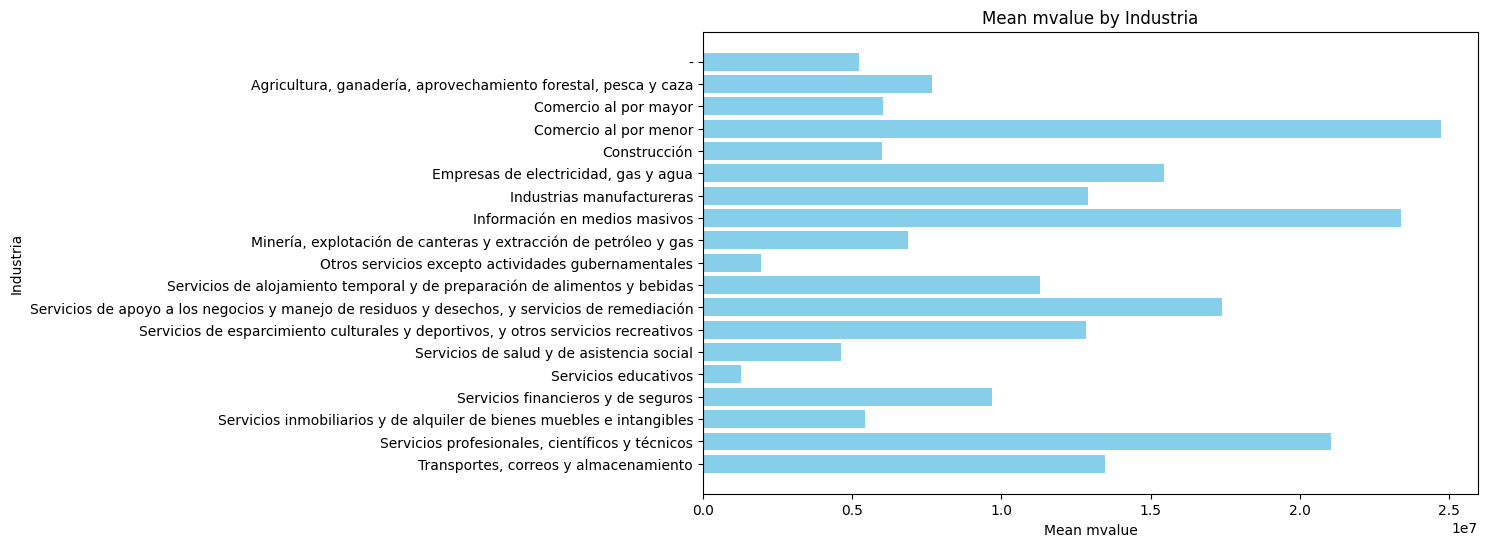

In [224]:
# Extraer el mean the 'market value' para cada industria
mean_mvalue = industrySummary['mvalue']['mean']

# Extraer la industria como si fuera un index
industrias = industrySummary.index

# Graficar para darnos una mejor idea de como esta distribuido
plt.figure(figsize=(10, 6))
plt.barh(industrias, mean_mvalue, color='skyblue')
plt.xlabel('Mean mvalue')
plt.ylabel('Industria')
plt.title('Mean mvalue by Industria')
plt.gca().invert_yaxis()  
plt.show()

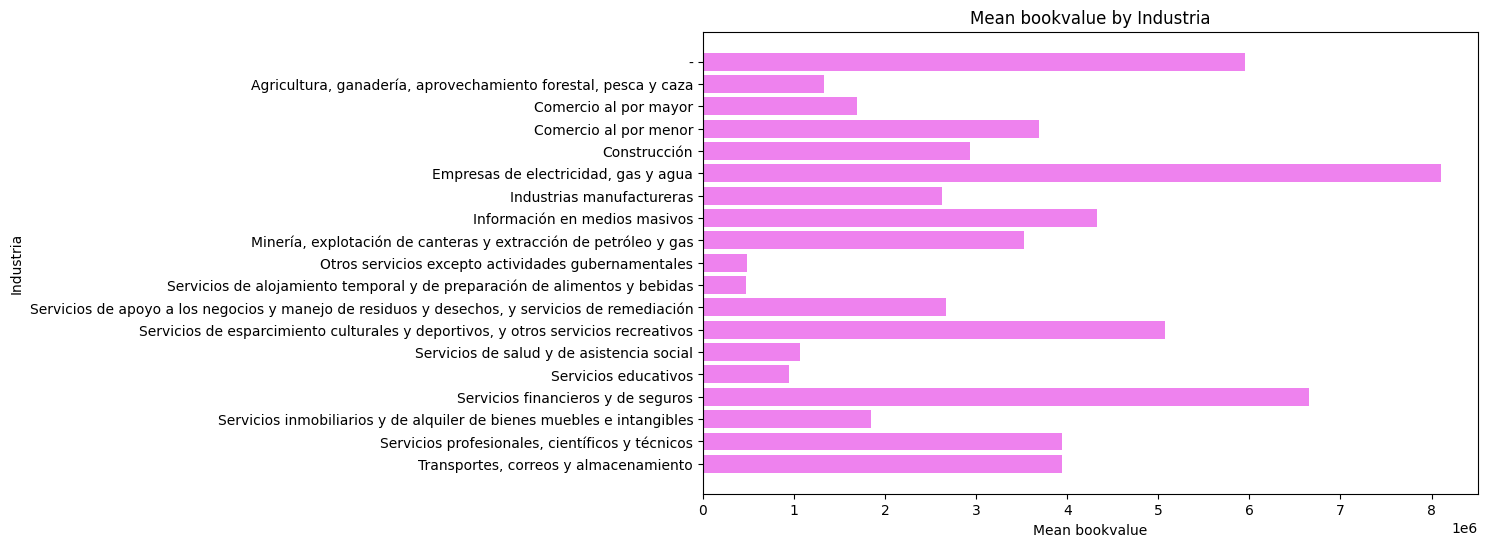

In [225]:
# Extraer el mean the 'market value' para cada industria
mean_bookvalue = industrySummary['bookvalue']['mean']

# Extraer la industria como si fuera un index
industrias = industrySummary.index

# Graficar para darnos una mejor idea de como esta distribuido
plt.figure(figsize=(10, 6))
plt.barh(industrias, mean_bookvalue, color='violet')
plt.xlabel('Mean bookvalue')
plt.ylabel('Industria')
plt.title('Mean bookvalue by Industria')
plt.gca().invert_yaxis()  
plt.show()

*PODEMOS OBSERVAR COMO EN LOS PROMEDIOS DE MARKET VALUE, HAY DOS INDUSTRIAS QUE SOBRESALEN, LA DE COMERCIO AL POR MENOR Y LA DE INFORMACIÓN EN MEDIOS MASIVOS. SIN EMBARGO ESTO CAMBIA CUANDO NOS VAMOS AL BOOK VALUE, EN EL BOOK VALUE LAS INDUSTRIAS QUE SOBRESALEN SON LAS EMPRESAS DE ELECTRICIDAD, GAS Y AGUA Y LAS DE SERVICIOS FINANCIEROS Y DE SEGUROS*

In [226]:
# Hacer otra tabla para que pueda leer mejor
industrySummary = active_2023q2_reset.pivot_table(
    index='industria', 
    values=['mvalue', 'bookvalue'], 
    aggfunc=['min', 'max', 'mean']
)

In [227]:
# Descriptive statistics for market value and book value for each industry
industrySummary.describe()

min                         max                   \
           bookvalue       mvalue      bookvalue           mvalue   
count          19.00        19.00          19.00            19.00   
mean   -3,231,163.30   286,508.54  91,834,246.00   570,083,010.93   
std     5,091,190.33 1,197,550.00 136,391,027.43   900,069,089.23   
min   -15,493,000.00        34.17   1,976,851.00     3,171,234.18   
25%    -4,275,783.00     2,947.24   7,995,000.00    51,347,612.61   
50%    -1,403,000.00     3,687.58  29,111,000.00   153,955,377.34   
75%      -374,381.00    13,274.37 135,329,000.00   597,805,377.61   
max     5,948,964.00 5,231,091.58 539,883,000.00 3,050,896,326.94   

              mean                
         bookvalue        mvalue  
count        19.00         19.00  
mean  3,224,244.15 10,908,930.03  
std   2,141,734.77  6,979,393.28  
min     469,942.55  1,285,681.43  
25%   1,507,944.53  5,715,319.22  
50%   2,934,480.25  9,689,768.58  
75%   4,136,329.32 14,450,301.30  
max   8,103,910.74 24,720,931.28

In [228]:
# Calculate standard deviation for market value and book value for each industry
industrySummary.std()

min   bookvalue     5,091,190.33
      mvalue        1,197,550.00
max   bookvalue   136,391,027.43
      mvalue      900,069,089.23
mean  bookvalue     2,141,734.77
      mvalue        6,979,393.28
dtype: float64

*DE TODO ESTE ANALISIS DESCRIPTIVO, PODEMOS OBSERVAR COMO BOOKVALUE TIENE UNA DESCIACION ESTANDAR RELATIVAMENTE ALTA , LO QUE SUGIERE UNA VARIABLIDAD SUSTANCIAL EN LOS VALORES CONTABLES DE LAS EMPRESAS. MIENTRAS QUE MVALUE TIENE UN RANGO MAS PEQUEÑO DE VALORES Y UNA MEDIA POSITIVA A DIFERENCIA DE BOOKVALUE QUE TIENE UNA MEDIA NEGATIVA. TAMBIEN TIENE UNA DESVIACION ESTANDAR MENOR A BOOKVALUE, LO QUE INDICA MENOS VARIABILIDAD EN LOS VALORES DE MERCADO DE LAS EMPRESAS.*

- Which are the biggest 10 US firms in terms of market value and how far they are from the typical size of a US firm?

In [229]:
# Sortear el the dataset por 'mvalue' en orden de mayor a menor
sorted_data = active_2023q2_reset.sort_values(by='mvalue', ascending=False)

# Seleccionar las 10 con mas valor
top_10_firms_mvalue = sorted_data.head(10)

# El typical size es el mean de todas las industrias
typical_size_mvalue = active_2023q2_reset['mvalue'].mean()

# Calcular la desviacion de la typical size
top_10_firms_mvalue['deviation_from_typical'] = top_10_firms_mvalue['mvalue'] - typical_size_mvalue

# Print las top 10 con su desviacion de la typical size
top_10_firms_mvalue[['firm', 'mvalue', 'deviation_from_typical']]

C:\Users\Ricardo Caceres\AppData\Local\Temp\ipykernel_24568\2099474239.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_firms_mvalue['deviation_from_typical'] = top_10_firms_mvalue['mvalue'] - typical_size_mvalue


,firm,mvalue,deviation_from_typical
8,AAPL,"3,050,896,326.94","3,037,693,265.83"
2111,MSFT,"2,532,080,938.79","2,518,877,877.68"
1381,GOOGL,"1,519,830,900.00","1,506,627,838.89"
193,AMZN,"1,337,539,706.77","1,324,336,645.65"
2263,NVDA,"1,044,859,400.00","1,031,656,338.89"
3183,TSLA,"829,681,140.87","816,478,079.76"
497,BRK_A,"750,735,436.68","737,532,375.57"
2009,META,"735,452,839.12","722,249,778.00"
3263,UNH,"447,491,234.90","434,288,173.78"
1874,LLY,"445,190,020.12","431,986,959.00"


- Which are the biggest 10 US firms in terms of book value and how far they are from the typical size of a US firm?

In [230]:
# Sortear el the dataset por 'bookvalue' en orden de mayor a menor
sorted_data = active_2023q2_reset.sort_values(by='bookvalue', ascending=False)

# Seleccionar las 10 con mas valor
top_10_firms_bookvalue = sorted_data.head(10)

# El typical size es el mean de todas las industrias
typical_size_bookvalue = active_2023q2_reset['bookvalue'].mean()

# Calcular la desviacion de la typical size
top_10_firms_bookvalue['deviation_from_typical'] = top_10_firms_bookvalue['bookvalue'] - typical_size_bookvalue

# Print las top 10 con su desviacion de la typical size
top_10_firms_bookvalue[['firm', 'bookvalue', 'deviation_from_typical']]

C:\Users\Ricardo Caceres\AppData\Local\Temp\ipykernel_24568\1262861469.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_firms_bookvalue['deviation_from_typical'] = top_10_firms_bookvalue['bookvalue'] - typical_size_bookvalue


,firm,bookvalue,deviation_from_typical
497,BRK_A,"539,883,000.00","536,184,026.90"
1728,JPM,"312,516,000.00","308,817,026.90"
365,BAC,"283,319,000.00","279,620,026.90"
1381,GOOGL,"267,141,000.00","263,442,026.90"
541,C,"209,422,000.00","205,723,026.90"
3507,XOM,"206,997,000.00","203,298,026.90"
2111,MSFT,"206,223,000.00","202,524,026.90"
3429,WFC,"181,952,000.00","178,253,026.90"
193,AMZN,"168,602,000.00","164,903,026.90"
854,CVX,"159,298,000.00","155,599,026.90"


### 5. Evolution of the US financial market

Considering the whole history of financial data for all firms, and only annual fiscal information (selecting fiscalmonth=12) :

In [231]:
datay = data.loc[data['fiscalmonth']==12]

- How the total market value of the US market has changed over the years? Do a table and/or graph and explain

In [232]:
fmarket = datay[['year', 'mvalue', 'revenue', 'netincome']]
fmarket = fmarket.reset_index()
fmarket

,firm,qdate,year,mvalue,revenue,netincome
0,A,2000Q4,2000,"24,986,059.36","10,773,000.00","757,000.00"
1,A,2001Q4,2001,"13,219,949.12","8,396,000.00","174,000.00"
2,A,2002Q4,2002,"8,387,758.60","6,010,000.00","-1,032,000.00"
3,A,2003Q4,2003,"13,922,599.19","6,056,000.00","-2,058,000.00"
4,A,2004Q4,2004,"11,732,870.20","7,181,000.00","349,000.00"
...,...,...,...,...,...,...
59092,ZYNE,2019Q4,2019,"140,115.98",0.00,"-32,943.58"
59093,ZYNE,2020Q4,2020,"97,149.28",0.00,"-51,336.83"
59094,ZYNE,2021Q4,2021,"118,706.51",0.00,"-37,309.02"
59095,ZYNE,2022Q4,2022,"24,943.24",0.00,"-35,035.81"


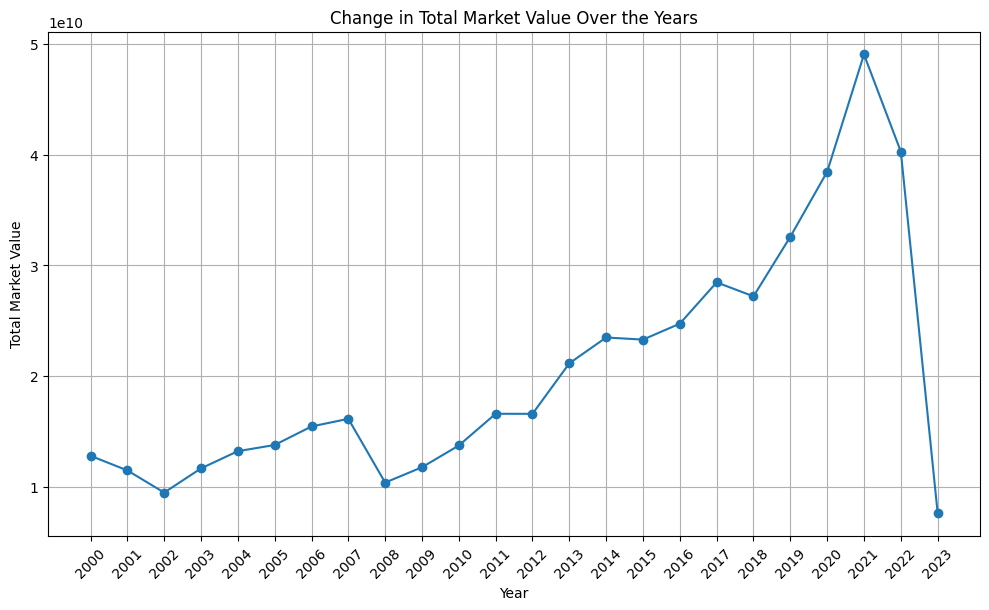

In [233]:
# Agrupar por año u calcular el market value 
market_value_by_year = fmarket.groupby('year')['mvalue'].sum().reset_index()

# Graficar para ver como cambia el market value a lo largo de los años
plt.figure(figsize=(10, 6))
plt.plot(market_value_by_year['year'], market_value_by_year['mvalue'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Market Value')
plt.title('Change in Total Market Value Over the Years')
plt.grid(True)
plt.tight_layout()
plt.xticks(market_value_by_year['year'], rotation=45)
plt.show()

- How total revenue and total net income of all US firms has changed over the years? Do a table and/or graph and explain

In [234]:
fmarket = datay[['year', 'mvalue', 'revenue', 'netincome']].groupby('year').sum()
fmarket

,mvalue,revenue,netincome
year,,,
2000,"12,814,978,634.15","6,380,672,838.05","344,723,426.83"
2001,"11,494,392,671.37","7,493,006,671.41","67,530,325.20"
2002,"9,494,723,157.61","7,320,441,084.79","-57,773,458.77"
2003,"11,675,951,523.21","7,924,776,768.22","364,552,095.88"
2004,"13,230,878,635.88","8,816,237,201.06","431,717,996.76"
2005,"13,789,108,526.52","9,645,438,810.16","522,880,104.83"
2006,"15,461,254,772.55","10,540,362,264.44","657,926,147.83"
2007,"16,149,130,338.06","11,256,645,716.63","610,497,891.61"
2008,"10,395,016,561.41","11,607,977,855.77","342,187,423.38"


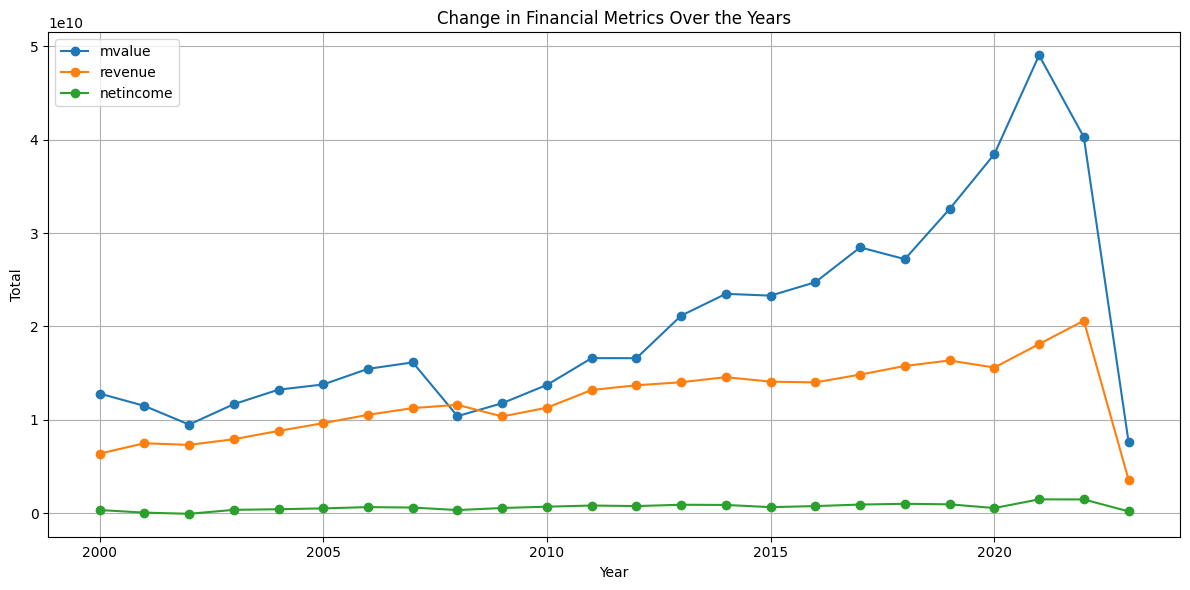

In [235]:
plt.figure(figsize=(12, 6))
plt.plot(fmarket.index, fmarket['mvalue'], marker='o', linestyle='-', label='mvalue')
plt.plot(fmarket.index, fmarket['revenue'], marker='o', linestyle='-', label='revenue')
plt.plot(fmarket.index, fmarket['netincome'], marker='o', linestyle='-', label='netincome')
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Change in Financial Metrics Over the Years')
plt.grid(True)
plt.legend()  # Add a legend to distinguish between the three lines
plt.tight_layout()
plt.show()

*PODEMOS OBSERVAR COMO HA CAMBIADO EL MARKET VALUE, EL NET INCOME Y EL REVENUE A LO LARGO DE LOS AÑOS. VEMOS QUE EL MARKET VALUE A INCREMENTADO A LO LARGO DEL TIEMPO, Y PODEMOS VISUALIZAR QUE EN EL 2008 HUBO UN BAJON POR EL FAMOSO MARKET CRASH. EL NETINCOME PODEMOS OBSERVAR COMO SE HA MANTENIDO RELATIVAMENTE ESTABLE. TAMBIEN NOS PODEMOS DAR CUENTA QUE COMO EL AÑO 2023 NO HA TERMINADO, ESTE SE MUESTRA EN LAS GRAFICAS COMO UN GRAN BAJON. PERO ESTO LO PODEMOS TOMAR COMO DATOS INCOMPLETOS YA QUE EL AÑO NO HA TERMINADO*

### 6. Learning about one Industry

Selecciono mi industria

- *Service Industries*


In [236]:
dataser = data.loc[
    (data['industria'] == 'Servicios de alojamiento temporal y de preparación de alimentos y bebidas') |
    (data['industria'] == 'Servicios de apoyo a los negocios y manejo de residuos y desechos, y servicios de remediación') |
    (data['industria'] == 'Servicios de esparcimiento cultural y deportivos, y otros servicios recreativos') |
    (data['industria'] == 'Servicios de salud y asistencia social') |
    (data['industria'] == 'Servicios educativos') |
    (data['industria'] == 'Servicios inmobiliarios y de alquiler de bienes muebles e intangibles') |
    (data['industria'] == 'Servicios profesionales, científicos y técnicos') |
    (data['industria'] == 'Transportes, correos y almacenamiento')
]
dataser['industria'].head(10)

firm      qdate 
AABA_old  2000Q1    Servicios profesionales, científicos y técnicos
          2000Q2    Servicios profesionales, científicos y técnicos
          2000Q3    Servicios profesionales, científicos y técnicos
          2000Q4    Servicios profesionales, científicos y técnicos
          2001Q1    Servicios profesionales, científicos y técnicos
          2001Q2    Servicios profesionales, científicos y técnicos
          2001Q3    Servicios profesionales, científicos y técnicos
          2001Q4    Servicios profesionales, científicos y técnicos
          2002Q1    Servicios profesionales, científicos y técnicos
          2002Q2    Servicios profesionales, científicos y técnicos
Name: industria, dtype: object

Using the subsample of your industry and using annual fiscal information (selecting rows with fiscalmonth=12), and the most recent complete year (2022), do the following:

In [237]:
# Using annual fiscal information, and the most recent complete year, and industrias que esten activas
dataser2022 = dataser.loc[(dataser['year']==2022) & (dataser['fiscalmonth']==12) & (dataser['status']=='activo')]
dataser2022.head()

,,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,totalassets,...,f4rq,ebit,opm,netincome,pm,ato,acidratio,finlev,mvalue,bookvalue
firm,qdate,,,,,,,,,,,,,,,,,,,,,
AAL,2022Q4,2022q4,12.00,"48,971,000.00",0.00,"47,364,000.00","325,000.00",0.00,"1,746,000.00","59,000.00","64,716,000.00",...,NaN,"1,607,000.00",0.03,"127,000.00",0.00,0.76,0.71,0.50,"8,266,739.28","-5,799,000.00"
ABM,2022Q4,2022q4,12.00,"7,806,600.00","6,757,500.00","700,300.00",0.00,"2,300.00","41,100.00","79,600.00","4,868,900.00",...,NaN,"348,800.00",0.04,"230,400.00",0.03,1.60,1.15,0.24,"2,913,982.38","1,717,300.00"
ABNB,2022Q4,2022q4,12.00,"8,399,000.00","1,499,000.00","5,098,000.00","25,000.00",0.00,"-162,000.00","96,000.00","16,038,000.00",...,NaN,"1,802,000.00",0.21,"1,893,000.00",0.23,0.52,1.86,0.14,"54,136,649.15","5,560,000.00"
ABSI,2022Q4,2022q4,12.00,"5,747.00",0.00,"112,497.00","2,357.00",0.00,972.00,-461.00,"321,008.00",...,NaN,"-106,750.00",-18.57,"-104,904.00",-18.25,0.02,6.17,0.05,"194,029.31","274,414.00"
ACCD,2022Q1,2022q1,12.00,"310,021.00","169,019.00","266,727.00",-133.00,0.00,"2,905.00","-5,639.00","1,285,529.00",...,-0.20,"-125,725.00",-0.41,"-123,124.00",-0.40,0.24,3.66,0.24,"1,175,789.15","855,794.00"


- Show descriptive statistics for future quarterly log return, annual return, total assets, revenue, netincome and all financial ratios calculated above. Provide a clear interpretation of the descriptive statistics of revenue and 1 financial ratio

In [238]:
# Selecciono las columnas de las variables que voy a analizar
dataser2022 = dataser2022[['q', 'totalassets', 'revenue', 'netincome', 'mvalue', 'bookvalue', 'opm', 'pm', 'ato', 'finlev', 'acidratio', 'rq', 'ry', 'f1rq']]
dataser2022.describe()

,totalassets,revenue,netincome,mvalue,bookvalue,opm,pm,ato,finlev,acidratio,rq,ry,f1rq
count,474.00,474.00,469.00,470.00,474.00,467.00,467.00,474.00,452.00,446.00,461.00,468.00,463.00
mean,"7,887,524.86","4,956,172.66","423,370.01","11,976,896.66","2,615,837.61",-1.86,-2.52,0.92,0.33,3.01,-0.41,0.00,-0.29
std,"22,912,511.98","16,689,622.63","3,350,399.38","61,205,144.02","13,749,831.44",23.87,36.58,1.60,0.29,10.98,0.58,0.27,0.54
min,"2,704.28",0.00,"-16,720,000.00","3,455.37","-8,876,000.00",-459.92,-755.42,0.00,0.00,0.06,-3.28,-1.69,-3.81
25%,"495,194.75","280,592.00","-16,517.00","332,844.40","87,683.00",-0.05,-0.07,0.36,0.09,1.00,-0.62,-0.10,-0.47
50%,"1,748,151.50","958,143.00","25,360.87","1,444,956.13","494,513.50",0.06,0.04,0.63,0.29,1.47,-0.28,0.05,-0.16
75%,"6,021,431.25","4,005,204.25","248,009.00","5,421,427.18","1,851,745.00",0.16,0.11,1.08,0.47,2.37,-0.03,0.15,0.04
max,"365,264,000.00","282,836,000.00","59,972,000.00","1,141,960,890.00","256,144,000.00",0.81,9.94,29.46,1.96,208.29,1.24,0.88,0.92


*CON ESTAS ESTADISTICAS DESCRIPTIVAS NOS DAMOS CUENTA QUE PAR REVENUE, LA MEDIA ES 4,956,173. Y QUE LA DESVIACION ESTANDAR ES BASTANTE GRANDE, LO QUE NOS INDICA QUE HAY UNA VARIABLIDAD SIGNIFICATIVA EN EL REVENUE DE LOS QUARTERS. PODEMOS OBSERVAR COMO EL 25% DE LOS TRIMESTRES TIENEN UN REVENUE POR DEBAJO DE 280,592, Y QUE LA MEDIANA DEL REVENUE TRIMESTRALES ES DE 958,143 LO QUE NOS DICE QUE LA MITAD DE LOS TRIMESTRES TIENEN REVENUE POR DEBAJO DE ESE VALOR. Y FINALMENTE EL 75% DE LOS TRIMESTRES TIENEN REVENUE POR DEBAJO DE LOS 4,005,204.25. PODEMOS TAMBIEN OBSERVAR COMO EXISTEN TRIMESTRES CON REVENUE MUY GRANDE PERO TAMBIEN EXISTEN TRIMESTRES SIN REVENUE. POR OTRO LADO, PODEMOS OBSERVAR EL OPM QUE EN PROMEDIO, LAS EMPRESAS TUVIERON UN MARGEN DE BENEFICIO OPERATIVO NEGATIVO. LA DESVIACION ESTANDAR NOS DICE QUE HAY UNA VARIABILIDAD CONSIDERABLE, Y QUE HAY ALGUNOS QUARTERS QUE SE REPORTARON PERDIDAS OPERATIVAS SIGNIFICATIVAS Y OTROS QUE LOGRARON MARGENES DE BENEFICIO OPERATIVO POSITIVOS. LA MEDIANA DE 0.06% NOS DICE QUE, EN PROMEDIO, LAS EMPRESAS TUVIERON UN MARGEN DE BENEFICIO OPERATIVO POSITIVO PERO PEQUEÑO, CASI NULO*

Using annual fiscal data (selecting rows with fiscalmonth=12), and all years:

In [239]:
datasery = dataser.loc[(dataser['fiscalmonth'] == 12) & (dataser['status']=="activo")]
datasery[['fiscalmonth', 'revenue']].head()

fiscalmonth       revenue
firm qdate                            
AAL  2000Q4        12.00 19,703,000.00
     2001Q4        12.00 18,963,000.00
     2002Q4        12.00 17,299,000.00
     2003Q4        12.00 17,440,000.00
     2004Q4        12.00 18,645,000.00

- Show a correlation matrix with the same variables you used for descriptive statistics above, but in the case of totalassets, revenue and netincome, use the logarithmic transformation of their values. Which variables have strongest and significant linear relationship with stock returns (annual and quarterly)? Explain

In [240]:
# Calculo logaritmo de las vaiables financieras (no de los ratios)
datasery['log_totalassets'] = np.where(datasery['totalassets']==0, np.NaN, np.log(datasery['totalassets']))
datasery['log_revenue'] = np.where(datasery['revenue']==0, np.NaN, np.log(datasery['revenue']))
datasery['log_netincome'] = np.where(datasery['netincome']==0, np.NaN, np.log(datasery['netincome']))

# Variables para la matriz de correlacion
correlation_vars = ['mvalue', 'bookvalue', 'opm', 'pm', 'ato', 'finlev', 'acidratio', 'log_totalassets', 'log_revenue', 'log_netincome', 'rq', 'f1rq']

# Crear la matriz de correlacion
correlation_matrix = datasery[correlation_vars].corr()

correlation_matrix

C:\Users\Ricardo Caceres\AppData\Local\Temp\ipykernel_24568\2184079102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasery['log_totalassets'] = np.where(datasery['totalassets']==0, np.NaN, np.log(datasery['totalassets']))
C:\Users\Ricardo Caceres\AppData\Roaming\Python\Python39\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Ricardo Caceres\AppData\Local\Temp\ipykernel_24568\2184079102.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

,mvalue,bookvalue,opm,pm,ato,finlev,acidratio,log_totalassets,log_revenue,log_netincome,rq,f1rq
mvalue,1.00,0.76,0.01,0.01,-0.04,-0.02,0.01,0.26,0.25,0.31,0.05,0.03
bookvalue,0.76,1.00,0.01,0.01,-0.08,-0.05,-0.00,0.35,0.31,0.37,0.02,0.02
opm,0.01,0.01,1.00,0.90,0.04,0.03,-0.45,0.04,0.17,0.24,0.02,0.02
pm,0.01,0.01,0.90,1.00,0.03,0.02,-0.32,0.03,0.15,0.10,-0.00,-0.00
ato,-0.04,-0.08,0.04,0.03,1.00,-0.15,-0.09,-0.27,0.04,-0.19,0.02,0.00
finlev,-0.02,-0.05,0.03,0.02,-0.15,1.00,-0.10,0.18,0.19,0.16,-0.01,0.01
acidratio,0.01,-0.00,-0.45,-0.32,-0.09,-0.10,1.00,-0.15,-0.27,-0.14,-0.03,-0.03
log_totalassets,0.26,0.35,0.04,0.03,-0.27,0.18,-0.15,1.00,0.88,0.85,0.07,0.07
log_revenue,0.25,0.31,0.17,0.15,0.04,0.19,-0.27,0.88,1.00,0.82,0.10,0.08
log_netincome,0.31,0.37,0.24,0.10,-0.19,0.16,-0.14,0.85,0.82,1.00,0.02,0.01


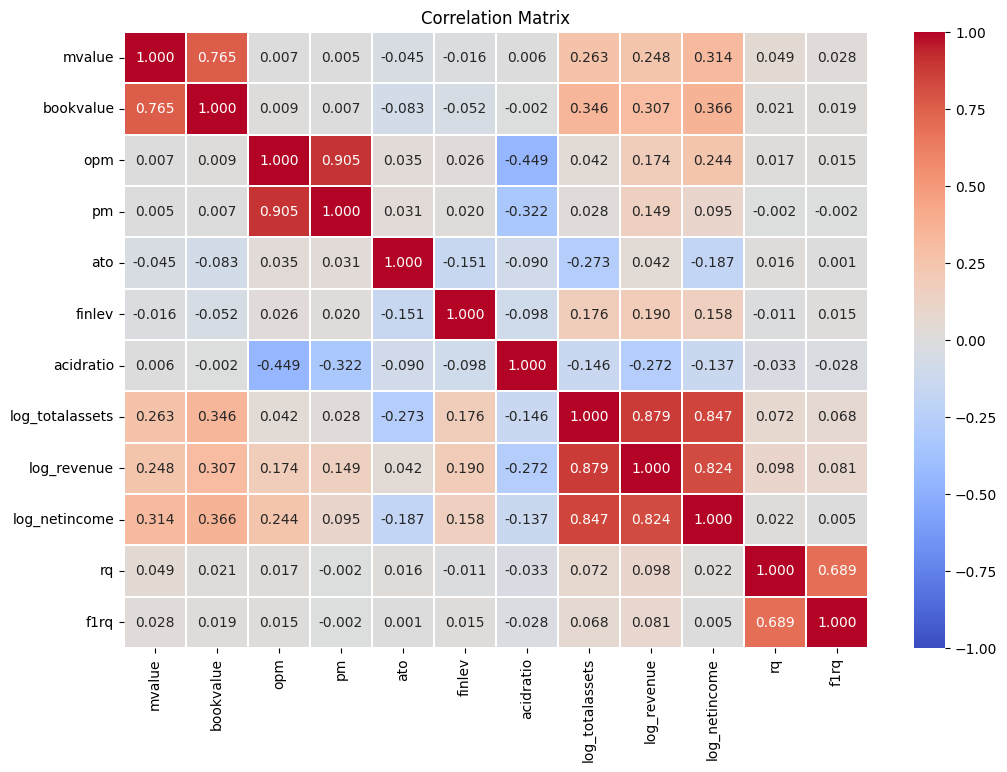

In [241]:
plt.figure(figsize=(12, 8))
# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.3, fmt='0.3f')
plt.title('Correlation Matrix')
plt.show()

*CON ESTA MATRIZ DE CORRELACION PDEMOS EXTRAER CONCLUSIONES IMPORTANTES SOBRE LAS VARIABLES Y DETERMINAR SI TIENEN ALGUNA RELACION ENTRE SI. POR EJEMPLO. EL MVALUE Y EL BOOKVALUE TIENEN UNA RELACION POSITIVA DE 0.76, LO QUE NOS INDICA QUE A MEDIDA QUE EL VALOR DE MERCADO DE UNA EMPRESA AUMENTA, SU VALOR CONTABLE TAMBIEN TIENDE A AUMENTAR. DE ESTA RELACION PODEMOS DEDUCIR QUE LOS INVERSORES VALORAN POSITIVAMENTE LAS EMPRESAS CUYOS ACTIVOS TANGIBLES RESPALDAN SU VALOR EN EL MARKET. DE LA MISMA MANERA PODEMOS OBSERVAR UNA FUERTE CORRELACION ENTRE EL OPM Y EL PM, SU CORRELACION ES MUY ALTA, ES DE 0.90, LO QUE NOS INDICA QUE UN MARGEN DE BENEFICIO OPERATIVO MAS ALTO GENERALMENTE SE ASOCIA CON UN MARGEN DE BENEFICIO NETO MAS ALTO.*

Select 2-3 variables and 2-3 ratios with the strongest correlation with future log quarterly returns and do the following:

In [242]:
correlation_with_returns = correlation_matrix['f1rq'].sort_values(ascending=False)
 # Selecciona las 3 correlaciones más altas
strongest_correlations = correlation_with_returns.head(4) # La primera no cuenta porque es con la misma variable
strongest_correlations

f1rq              1.00
rq                0.69
log_revenue       0.08
log_totalassets   0.07
Name: f1rq, dtype: float64

- Do histograms for each factor/variables and interpret them

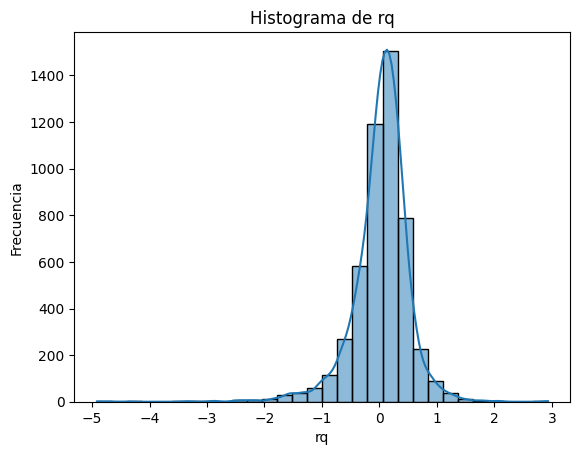

In [243]:
# Histograma de la variable con la correlación más fuerte
variable_name = strongest_correlations.index[1]

# Crear el histograma con Seaborn
sns.histplot(datasery[variable_name], bins=30, kde=True)  # Utilizamos kde=True para agregar una estimación de la densidad
plt.xlabel(variable_name)
plt.ylabel('Frecuencia')
plt.title(f'Histograma de {variable_name}')
plt.show()

*CON ESTE HISTOGRAMA PODEMOS DARNOS CUENTA QUE LOS VALORES ESTAN DISTRIBUIDOS DE MANERA UNIFORME ALREDEDOR DE UN VALOR CENTRAL EL CUAL TIENDE A SER 0. SIN EMBARGO PODEMOS VER COMO HAY UN SESGO NEGATIVO, LO QUE SIGNIFICA QUE HAY VALORES MAS BAJOS EN EL EXTREMO IZQUIERDO DE LA DISTRIBUCION*

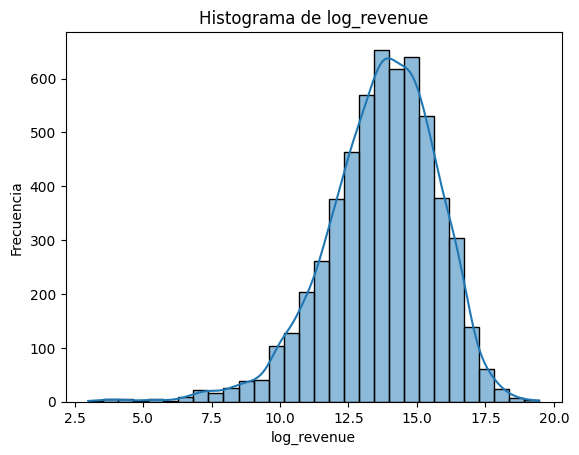

In [244]:
# Histograma de la segunda variable con la correlación más fuerte
# Histograma de la variable con la correlación más fuerte
variable_name = strongest_correlations.index[2]

# Crear el histograma con Seaborn
sns.histplot(datasery[variable_name], bins=30, kde=True)  # Utilizamos kde=True para agregar una estimación de la densidad
plt.xlabel(variable_name)
plt.ylabel('Frecuencia')
plt.title(f'Histograma de {variable_name}')
plt.show()

*EN ESTE HISTOGRAMA PODEMOS VER COMO LOS DATOS TIENDEN A AGRUPARSE EN UN VALOR CENTRAL, EN ESTE CASO ALREDEDOR DE 13*

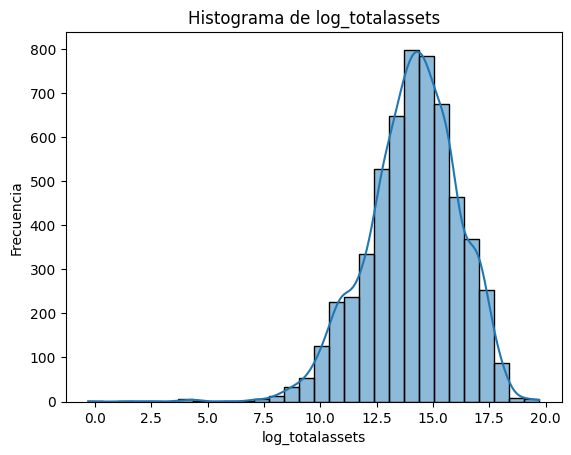

In [245]:
# Histograma de la tercera variable con la correlación más fuerte
# Histograma de la variable con la correlación más fuerte
variable_name = strongest_correlations.index[3]

# Crear el histograma con Seaborn
sns.histplot(datasery[variable_name], bins=30, kde=True)  # Utilizamos kde=True para agregar una estimación de la densidad
plt.xlabel(variable_name)
plt.ylabel('Frecuencia')
plt.title(f'Histograma de {variable_name}')
plt.show()

*EN ESTE HISTOGRAMA PODEMOS VER COMO LOS VALORES ESTAN DISTRIBUIDOS DE MANERA NORMAL, CON ALGUNOS VALORES EN EL EXTREMOS IZQUIEDO*

- Do plots to visualize the possible relationship each factor might have with quarterly returns (the dependent variable).

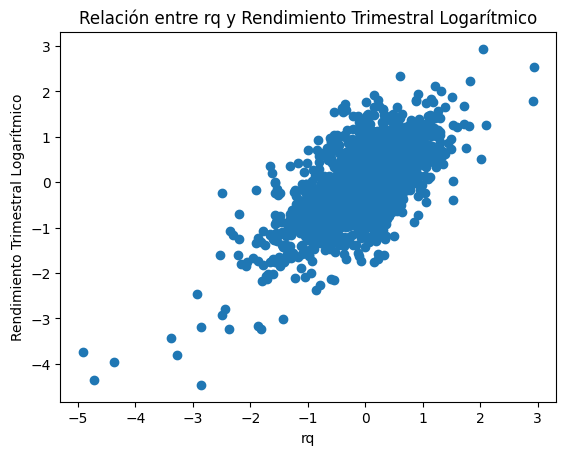

In [246]:
# Gráfico de dispersión de la variable con la correlación más fuerte
plt.scatter(datasery[strongest_correlations.index[1]], datasery['f1rq'])
plt.xlabel(strongest_correlations.index[1])
plt.ylabel('Rendimiento Trimestral Logarítmico')
plt.title(f'Relación entre {strongest_correlations.index[1]} y Rendimiento Trimestral Logarítmico')
plt.show()

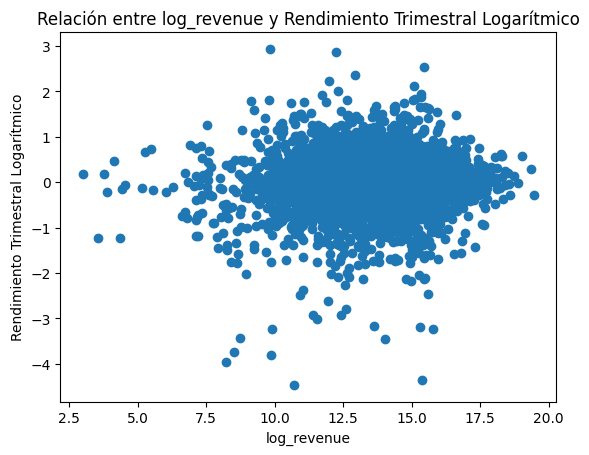

In [247]:
# Gráfico de dispersión de la segunda variable con la correlación más fuerte
plt.scatter(datasery[strongest_correlations.index[2]], datasery['f1rq'])
plt.xlabel(strongest_correlations.index[2])
plt.ylabel('Rendimiento Trimestral Logarítmico')
plt.title(f'Relación entre {strongest_correlations.index[2]} y Rendimiento Trimestral Logarítmico')
plt.show()

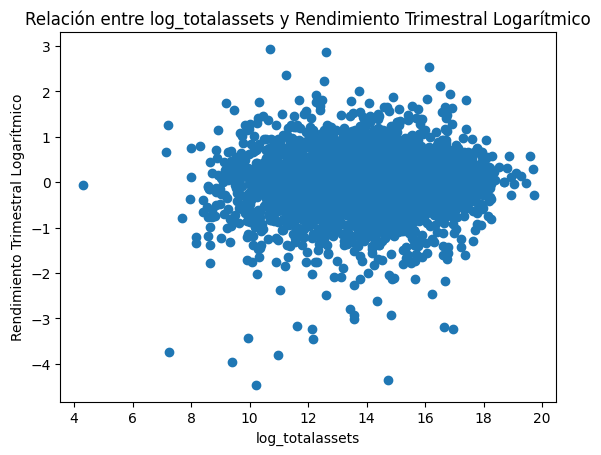

In [248]:
# Gráfico de dispersión de la tercera variable con la correlación más fuerte
plt.scatter(datasery[strongest_correlations.index[3]], datasery['f1rq'])
plt.xlabel(strongest_correlations.index[3])
plt.ylabel('Rendimiento Trimestral Logarítmico')
plt.title(f'Relación entre {strongest_correlations.index[3]} y Rendimiento Trimestral Logarítmico')
plt.show()

- Design and run a first version of a multiple regression model to examine whether your selected factors can explain/predict quarterly stock returns.

In [249]:
dataset = datasery.dropna()

In [276]:
X = dataset[['log_totalassets', 'log_revenue', 'rq']]
X = sm.add_constant(X)

Y = dataset[['f1rq']]

model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   f1rq   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     799.3
Date:                Wed, 06 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:43:18   Log-Likelihood:                -673.89
No. Observations:                3289   AIC:                             1356.
Df Residuals:                    3285   BIC:                             1380.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0224      0.046     

- You must check for possible multicollinearity problems. Briefly explain what is multicollinearity, run and interpret the corresponding test

*LA MULTICOLINEALIDAD PASA EN LAS REGRESIONES MULTIPLES DONDE DOS O MAS VARIABLES INDEPENDIENTES ESTAN CORRELACIONADAS ENTRE SI. ES IMPORTANTE TRATAR ESTOS CASOS YA QUE ESTOS DIFICULTAN AISLAR EL EFECTO INDIVIDUAL DE CADA VARIABLE INDEPENDIENTE SOBRE LA VARIABLE DEPENDIENTE.*

*EXISTEN DOS TIPOS DE MULTICOLINEALIDAD. EL PRIMERO ES CUANDO DOS O MAS VARIABLES INDEPENDIENTES ESTAN PERFECTAMENTE CORRELACIONADAS, LO QUE NOS INDICA QUE HAY UNA RELACION LINEAL, EN ESTOS CASOS EL MODELO NO PUEDE DISTINGUIR EL EFECTO UNICO DE CADA VARIABLE. EL SEGUDO TIPO ES CUANDO LAS VARIABLES INDEPENDIENTES ESTAN ALTAMENTE CORRELACIONADAS, PERO NO PERFECTAMENTE CORRELACIONADAS, ESTO NOS PUEDE DAR COMO RESULTADO ESTIMACIONES DE COEFICIENTES INESTABLES Y ERRORES ESTANDAR ELEVADOS, LOQ EU DIFICULTA INTERPRETAR LA SIGNIFICANCIA DE LAS VARIABLES INDIVIDUALES.*

*EL FACTOR DE INFLACION DE LA VARIANZA (VIF) MIDE CUANTO SE INCREMENTA LA VARIANZA DE UN COEFICIENTE DE REGRESION ESTIMADO DEBIDO A LA MULTICOLINEALIDAD. UN VALOR DE 5-10 INDICA UNA ALTA MULTICOLINEALIDAD*

In [277]:
# Calcular el VIF para cada variable independiente
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

,Variable,VIF
0,const,78.40
1,log_totalassets,6.43
2,log_revenue,6.43
3,rq,1.00


In [278]:
X = X.reset_index()
X = X[['const', 'log_totalassets', 'log_revenue', 'rq']]
X.columns

Index(['const', 'log_totalassets', 'log_revenue', 'rq'], dtype='object')

- (optional) For each independent variable (variable/ratio) check if winsorization is needed according to very extreme values. You can check this with the histograms of each variable/ratio. If it is necessary do the corresponding adjustments with winsorization to avoid unreliable results in your regression model

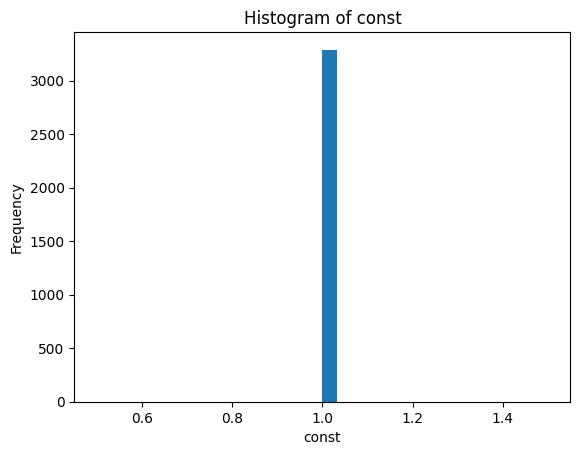

No winsorization needed for const


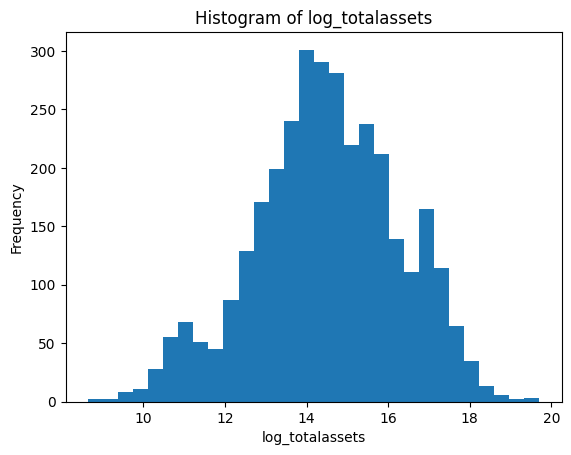

Winsorization applied to log_totalassets


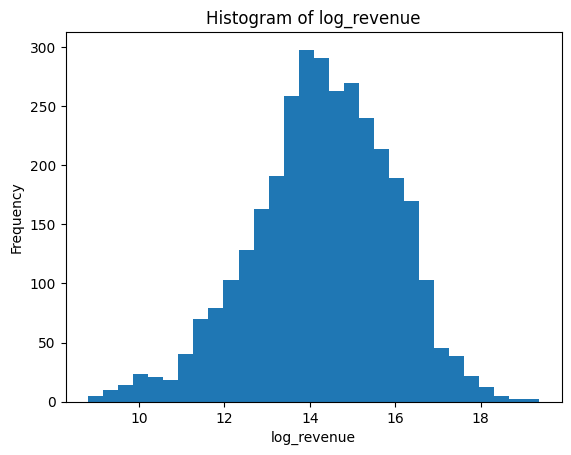

Winsorization applied to log_revenue


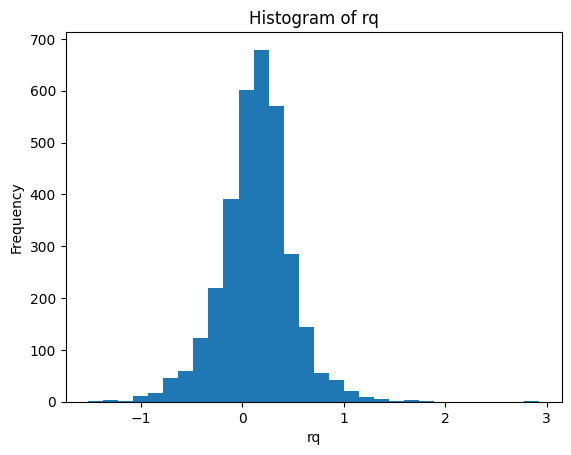

Winsorization applied to rq


In [279]:

# Assuming X contains your independent variables

# Define a function to visualize histograms and apply winsorization if needed
def visualize_and_winsorize(column):
    # Plot histogram
    plt.hist(X[column], bins=30)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()
    
    # Determine winsorization thresholds
    lower_percentile = 0.01
    upper_percentile = 0.99

    # Calculate the values corresponding to the percentiles
    lower_threshold = X[column].quantile(lower_percentile)
    upper_threshold = X[column].quantile(upper_percentile)

    # Check if winsorization is needed (based on your judgment)
    if any(X[column] < lower_threshold) or any(X[column] > upper_threshold):
        # Calculate the limits as proportions (between 0 and 1)
        lower_limit = lower_percentile
        upper_limit = 1.0 - upper_percentile

        # Apply winsorization and update the column in X
        X[column] = winsorize(X[column], limits=(lower_limit, upper_limit))
        print(f'Winsorization applied to {column}')
    else:
        print(f'No winsorization needed for {column}')

# Loop through each independent variable and visualize histograms
for col in X.columns:
    visualize_and_winsorize(col)

- Once you corrected your variables/ratios with winsorization (in case you did it) and addressed possible multicollienarity problems, run a final multiple regression model

In [280]:
X.head()

,const,log_totalassets,log_revenue,rq
0,1.00,17.59,17.57,0.76
1,1.00,17.70,17.53,-0.23
2,1.00,17.75,17.51,0.11
3,1.00,17.76,17.56,0.12
4,1.00,17.92,17.61,-0.47


In [291]:
Y = Y.reset_index()
Y = Y['f1rq']

In [292]:
# Assuming X contains your independent variables (with winsorization applied)
# And Y contains your dependent variable (f1rq)

X = sm.add_constant(X)  # Add a constant term (intercept) to the model

model = sm.OLS(Y, X).fit()  # Fit the multiple regression model

print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                   f1rq   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     766.8
Date:                Wed, 06 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:46:18   Log-Likelihood:                -702.31
No. Observations:                3289   AIC:                             1413.
Df Residuals:                    3285   BIC:                             1437.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0279      0.047     

- Interpret your model
  
  - Interpret with your own words the results of each coefficient (beta and their statistical significance)
  
  - Interpret the R-squared of the model
  
  - Write a conclusion of your results

*LOS COEFICIENTES QUE NOS DA NUESTRO MODELO DE REGRESION SON LOS SIGUIENTES: EL const (EL CUAL ES NUESTRO INTERCEPT) TIENE UN COEFICIENTE DE 0.0279. ESTO REPRESENTA EL VALOR DE f1rq CUANDO TODAS LAS VARIABLES INDEPENDIENTES SON CERO. TAMBIEN PODEMOS VER QUE ESTE VALOR NO ES SIGNIFICATIVO YA QUE SU VALOR DE P ES 0.552. AL IGUAL QUE LOS DEMAS VALORES, QUE TIENEN UN VALOR DE -0.0082 Y DE 0.0061, NO SON SIGNIFICATIVOS  YA QUE SUS VALORES DE P SON BAJOS. SIN EMBARGO, EL COEFICIENTE DE RQ ES DE 0.75 LO CUAL NOS INDICA QUE UN AUMENTO DE UNA UNIDAD EN LA rq SIGNIFICA UN AUMENTO DE APROXIMADAMENTE 0.7571 EN EL f1rq. SU VALOR P SI ES SIGNIFICATIVO, POR LO QUE PODEMOS DECIR QUE rq ES UN PREDICTOR SIGNIFICATIVO DE f1rq*

*EL MODELO DE REGRESION NOS ARROJA UN VALOR DE R CUADRADO DE 0.412, LO QUE NOS INDICA QUE APROXIMADAMENTE EL 41.2% DE LA VARIACION EN LA VARIABLE DEPENDIENTE f1rq (LOS FUTURE RETURNS) SE EXPLICA MEDIANTE LAS VARIABLES DEPENDIENTES DE log_totalassets, log_revenue, y rq. CON ESTO PODEMOS DECIR QUE NUESTRO MODELO TIENE UN CASI LA MITAD DE PODER EXPLICATIVO, LO CUAL SIGNIFICA QUE AUN TIENE UNA PARTE SIGNIFICATIVA DE VARIACIOIN NO EXPLICADA.*